In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/netflix_users_data.csv')

In [ ]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


Приведение столбцов к стилю camel_case


In [ ]:
# Функция для преобразования строк в camelCase
def to_camel_case(s):
    # Разделяем строку на части по пробелам
    parts = s.split()
    # Первая часть остается с маленькой буквы, остальные части с заглавными буквами
    return parts[0].lower() + ''.join(word.capitalize() for word in parts[1:])

# Загружаем данные из CSV файла
file_path = '/content/drive/MyDrive/netflix_users_data.csv'  # Укажи путь к своему файлу
df = pd.read_csv(file_path)

# Применяем функцию для преобразования всех названий столбцов в формат camelCase
df.columns = [to_camel_case(col) for col in df.columns]

# Выводим первые несколько строк, чтобы убедиться, что столбцы преобразованы правильно
print(df.head())


   userId subscriptionType  monthlyRevenue  joinDate lastPaymentDate  \
0       1            Basic              10  15-01-22        10-06-23   
1       2          Premium              15  05-09-21        22-06-23   
2       3         Standard              12  28-02-23        27-06-23   
3       4         Standard              12  10-07-22        26-06-23   
4       5            Basic              10  01-05-23        28-06-23   

          country  age  gender      device planDuration  
0   United States   28    Male  Smartphone      1 Month  
1          Canada   35  Female      Tablet      1 Month  
2  United Kingdom   42    Male    Smart TV      1 Month  
3       Australia   51  Female      Laptop      1 Month  
4         Germany   33    Male  Smartphone      1 Month  


Приведение типов данных


In [ ]:
# Преобразуем колонки с датами к типу datetime
df['joinDate'] = pd.to_datetime(df['joinDate'], format='%d-%m-%y')  # Формат даты: день-месяц-год
df['lastPaymentDate'] = pd.to_datetime(df['lastPaymentDate'], format='%d-%m-%y')

# Выводим типы данных, чтобы убедиться, что колонки преобразованы
print(df.dtypes)

# Выводим первые строки для проверки
print(df.head())

userId                       int64
subscriptionType            object
monthlyRevenue               int64
joinDate            datetime64[ns]
lastPaymentDate     datetime64[ns]
country                     object
age                          int64
gender                      object
device                      object
planDuration                object
dtype: object
   userId subscriptionType  monthlyRevenue   joinDate lastPaymentDate  \
0       1            Basic              10 2022-01-15      2023-06-10   
1       2          Premium              15 2021-09-05      2023-06-22   
2       3         Standard              12 2023-02-28      2023-06-27   
3       4         Standard              12 2022-07-10      2023-06-26   
4       5            Basic              10 2023-05-01      2023-06-28   

          country  age  gender      device planDuration  
0   United States   28    Male  Smartphone      1 Month  
1          Canada   35  Female      Tablet      1 Month  
2  United Kingdom   42 

Поиск дублей и пропусков в данных


In [ ]:
# Поиск дубликатов
duplicates = df[df.duplicated()]  # Возвращает строки, которые являются дубликатами
print("Дубликаты в данных:")
print(duplicates)

# Поиск пропусков
missing_values = df.isnull().sum()  # Считает количество пропущенных значений в каждом столбце
print("\nПропущенные значения по каждому столбцу:")
print(missing_values)

# Выводим строки, где есть хотя бы одно пропущенное значение
rows_with_missing = df[df.isnull().any(axis=1)]
print("\nСтроки с пропущенными значениями:")
print(rows_with_missing)

Дубликаты в данных:
Empty DataFrame
Columns: [userId, subscriptionType, monthlyRevenue, joinDate, lastPaymentDate, country, age, gender, device, planDuration]
Index: []

Пропущенные значения по каждому столбцу:
userId              0
subscriptionType    0
monthlyRevenue      0
joinDate            0
lastPaymentDate     0
country             0
age                 0
gender              0
device              0
planDuration        0
dtype: int64

Строки с пропущенными значениями:
Empty DataFrame
Columns: [userId, subscriptionType, monthlyRevenue, joinDate, lastPaymentDate, country, age, gender, device, planDuration]
Index: []


Исследовательский анализ данных


In [ ]:
df

,userId,subscriptionType,monthlyRevenue,joinDate,lastPaymentDate,country,age,gender,device,planDuration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month


In [ ]:
# сколько уникальных пользователей?
unique_users = df['userId'].nunique()
unique_users

2500

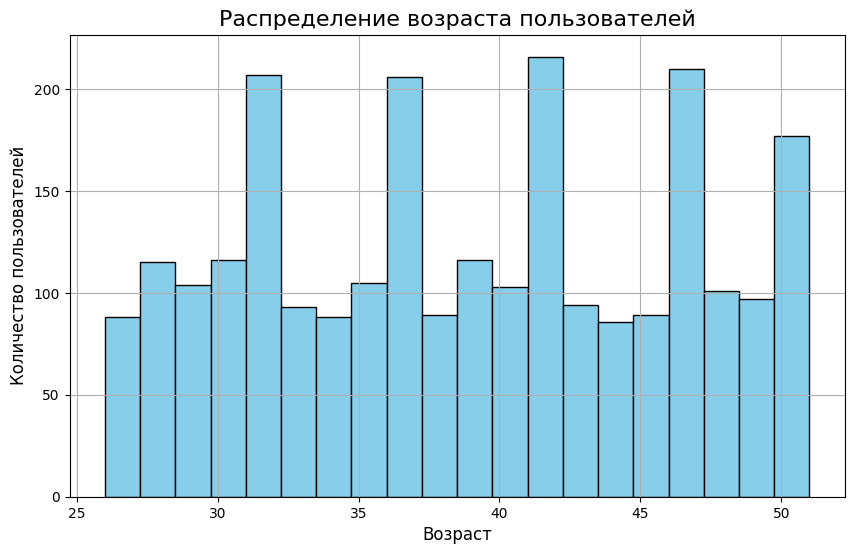

In [ ]:
# изучить возраст пользователей (визуализировать)
import matplotlib.pyplot as plt

# Построим гистограмму распределения возрастов пользователей
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение возраста пользователей', fontsize=16)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(True)

# Отобразим график
plt.show()

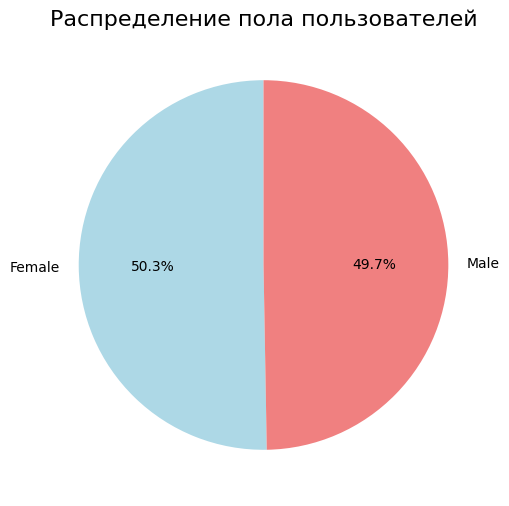

In [ ]:
# изучить пол пользователей (визуализировать)
# Построим диаграмму для распределения пола пользователей
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Распределение пола пользователей', fontsize=16)

# Отобразим график
plt.show()

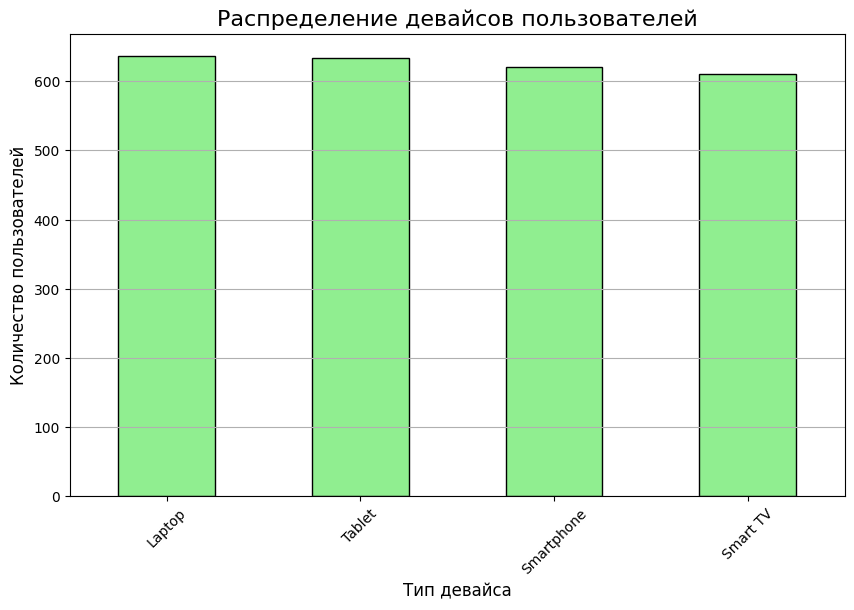

In [ ]:
# изучить девайсы пользователей (визуализировать)
# Построим диаграмму для распределения устройств пользователей
device_counts = df['device'].value_counts()

plt.figure(figsize=(10, 6))
device_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Распределение девайсов пользователей', fontsize=16)
plt.xlabel('Тип девайса', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Отобразим график
plt.show()

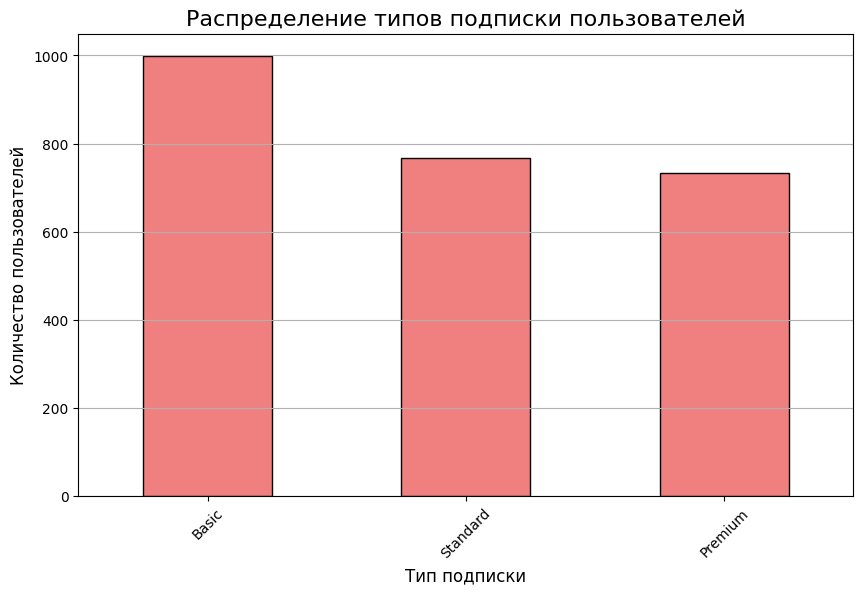

In [ ]:
# изучить тип подписки пользователей (визуализировать)
# Построим диаграмму для распределения типов подписки пользователей
subscription_counts = df['subscriptionType'].value_counts()

plt.figure(figsize=(10, 6))
subscription_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Распределение типов подписки пользователей', fontsize=16)
plt.xlabel('Тип подписки', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Отобразим график
plt.show()

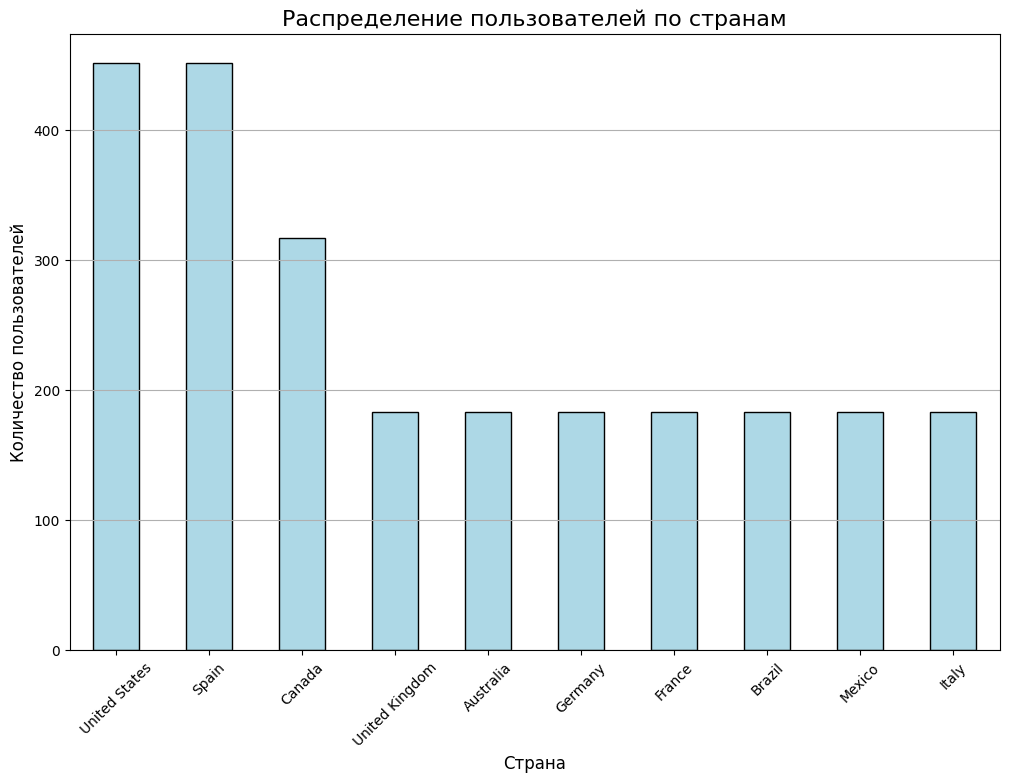

In [ ]:
# изучить локацию пользователей (визуализировать)
# Построим диаграмму для распределения пользователей по странам
location_counts = df['country'].value_counts()

plt.figure(figsize=(12, 8))
location_counts.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Распределение пользователей по странам', fontsize=16)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Отобразим график
plt.show()

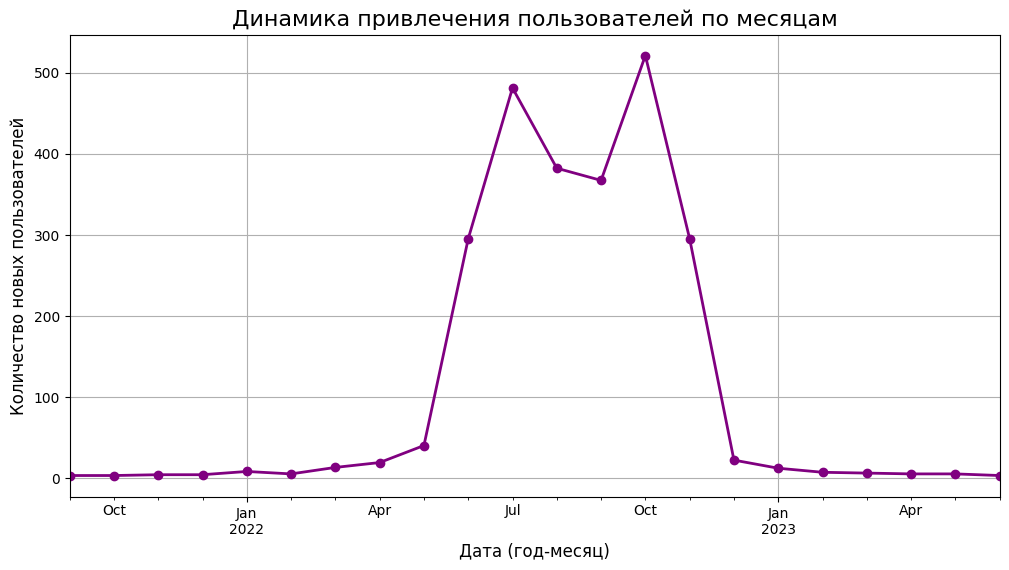

In [ ]:
# изучить динамику привлечения пользователей (Join Date)
# Преобразуем колонку joinDate в формат datetime, если это не было сделано
df['joinDate'] = pd.to_datetime(df['joinDate'], format='%d-%m-%y')

# Создаем новый столбец, содержащий только год и месяц
df['joinYearMonth'] = df['joinDate'].dt.to_period('M')

# Считаем количество пользователей, зарегистрировавшихся в каждом месяце
user_growth = df['joinYearMonth'].value_counts().sort_index()

# Визуализируем динамику привлечения пользователей
plt.figure(figsize=(12, 6))
user_growth.plot(kind='line', marker='o', color='purple', linestyle='-', linewidth=2)
plt.title('Динамика привлечения пользователей по месяцам', fontsize=16)
plt.xlabel('Дата (год-месяц)', fontsize=12)
plt.ylabel('Количество новых пользователей', fontsize=12)
plt.grid(True)

# Отобразим график
plt.show()

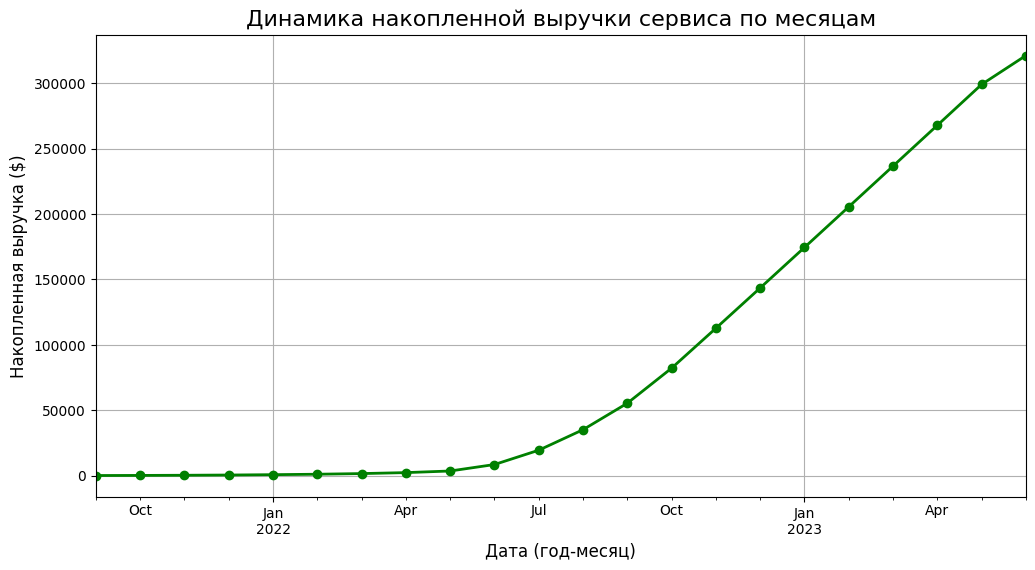

In [ ]:
# изучть динамику выручки сервиса (накопленное Monthly Revenue по месяцу с момента Join Date до момента Last Payment Date)

# Создадим серию дат от Join Date до Last Payment Date для каждого пользователя
df['payment_period'] = df.apply(lambda row: pd.date_range(start=row['joinDate'], end=row['lastPaymentDate'], freq='M'), axis=1)

# Разворачиваем данные, чтобы каждая дата (месяц) для каждого пользователя стала отдельной строкой
revenue_df = df.explode('payment_period')

# Создаем новый столбец для суммы выручки за каждый месяц
revenue_df['monthlyRevenue'] = revenue_df['monthlyRevenue'].astype(float)

# Группируем данные по месяцам и считаем накопленную выручку
monthly_revenue = revenue_df.groupby(revenue_df['payment_period'].dt.to_period('M'))['monthlyRevenue'].sum().cumsum()

# Визуализируем динамику накопленной выручки
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Динамика накопленной выручки сервиса по месяцам', fontsize=16)
plt.xlabel('Дата (год-месяц)', fontsize=12)
plt.ylabel('Накопленная выручка ($)', fontsize=12)
plt.grid(True)

# Отобразим график
plt.show()


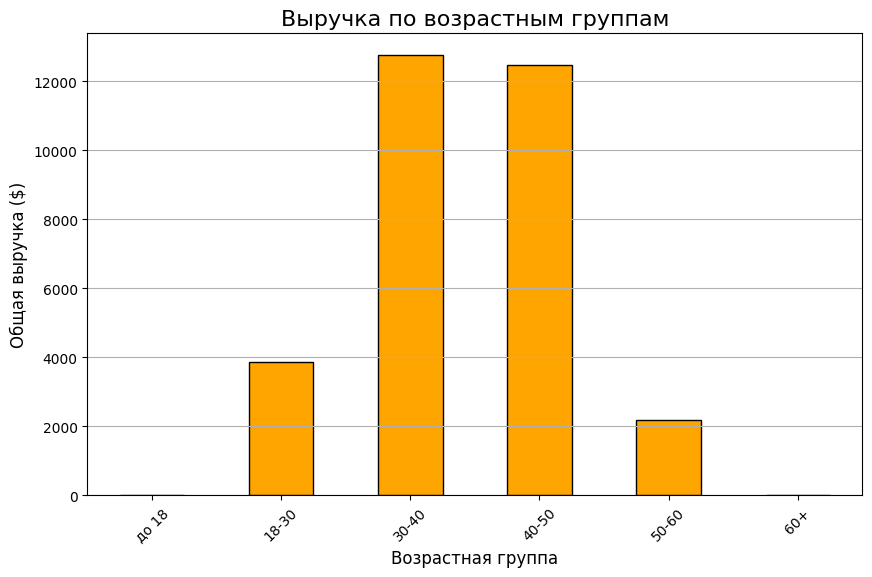

('30-40', 12747)

In [ ]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу
# Разобьем пользователей на возрастные группы (корзины)
age_bins = [0, 18, 30, 40, 50, 60, 100]  # Диапазоны возрастов
age_labels = ['до 18', '18-30', '30-40', '40-50', '50-60', '60+']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Рассчитаем выручку для каждой возрастной группы
age_group_revenue = df.groupby('age_group')['monthlyRevenue'].sum()

# Найдем самую платежеспособную возрастную группу
most_profitable_group = age_group_revenue.idxmax()
max_revenue = age_group_revenue.max()

# Визуализируем выручку по возрастным группам
plt.figure(figsize=(10, 6))
age_group_revenue.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Выручка по возрастным группам', fontsize=16)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Общая выручка ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Отобразим график
plt.show()

most_profitable_group, max_revenue

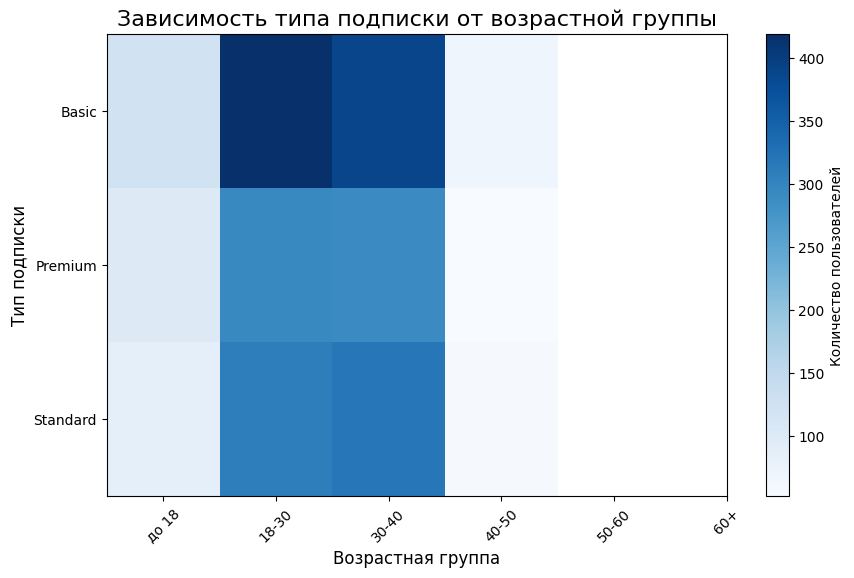

In [ ]:
# посмотреть зависимость типа тарифа от группы возраста пользователя
# Построим таблицу сопряженности для типа подписки и возрастной группы
subscription_age_group = pd.crosstab(df['subscriptionType'], df['age_group'])

# Визуализируем зависимость типа тарифа от возрастной группы с помощью тепловой карты
plt.figure(figsize=(10, 6))
plt.imshow(subscription_age_group, cmap='Blues', aspect='auto')
plt.title('Зависимость типа подписки от возрастной группы', fontsize=16)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Тип подписки', fontsize=12)
plt.xticks(ticks=range(len(age_labels)), labels=age_labels, rotation=45)
plt.yticks(ticks=range(len(subscription_age_group.index)), labels=subscription_age_group.index)
plt.colorbar(label='Количество пользователей')

# Отобразим тепловую карту
plt.show()

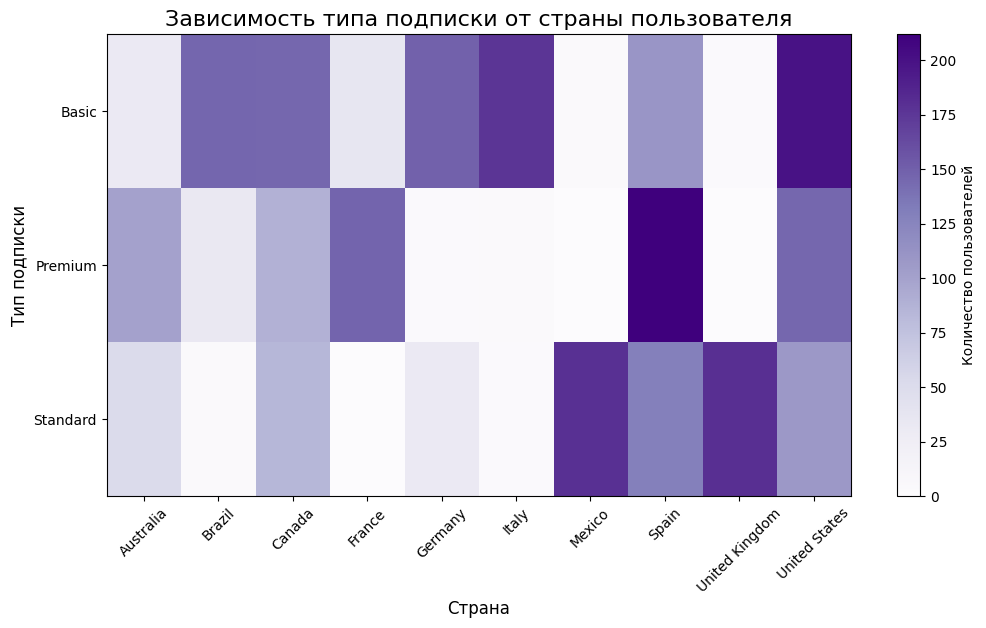

In [ ]:
# посмотреть зависимость типа тарифа от страны пользователя
# Построим таблицу сопряженности для типа подписки и страны пользователя
subscription_country = pd.crosstab(df['subscriptionType'], df['country'])

# Визуализируем зависимость типа тарифа от страны с помощью тепловой карты
plt.figure(figsize=(12, 6))
plt.imshow(subscription_country, cmap='Purples', aspect='auto')
plt.title('Зависимость типа подписки от страны пользователя', fontsize=16)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Тип подписки', fontsize=12)
plt.xticks(ticks=range(len(subscription_country.columns)), labels=subscription_country.columns, rotation=45)
plt.yticks(ticks=range(len(subscription_country.index)), labels=subscription_country.index)
plt.colorbar(label='Количество пользователей')

# Отобразим тепловую карту
plt.show()


Выводы

на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка


Детализированный анализ:

1. Количество пользователей.
В исследуемом наборе данных содержится 2500 уникальных пользователей. Это общее количество клиентов, которые зарегистрировались в системе за анализируемый период.
2. Возрастная структура пользователей.
Пользователи возрастной группы от 30 до 40 лет являются самой платежеспособной категорией, принося наибольшую выручку. Их общая выручка составляет 12,747 долларов.
Молодежь до 18 лет имеет наименьший вклад в выручку, что можно объяснить либо ограниченными финансовыми возможностями, либо меньшей заинтересованностью в использовании платных подписок.
Пользователи старше 60 лет также составляют меньшую часть аудитории сервиса.
3. Пол пользователей.
Распределение пользователей по полу практически равномерное. Это говорит о том, что как мужчины, так и женщины одинаково интересуются сервисом, что важно для универсальных маркетинговых кампаний.
4. Используемые устройства.
Смартфоны являются наиболее популярным устройством для доступа к сервису, что свидетельствует о том, что пользователи предпочитают потреблять контент "на ходу".
Смарт-телевизоры занимают второе место, что отражает популярность потребления контента в домашних условиях на большом экране.
Это подчеркивает важность оптимизации мобильных приложений и качества стриминга на телевизорах.
5. Тип подписки.
Наибольшей популярностью пользуется стандартная подписка. Это указывает на то, что пользователи выбирают баланс между ценой и набором функций.
Премиум-подписка привлекает более зрелую аудиторию, которая готова платить больше за улучшенное качество и возможность стриминга на нескольких устройствах одновременно.
Базовая подписка более популярна среди молодых пользователей, что может объясняться их ограниченным бюджетом.
6. Географическое распределение пользователей.
Пользователи сервиса представлены в различных странах, однако распределение по странам неравномерно. Основная доля пользователей сосредоточена в странах с более высоким уровнем дохода, таких как США, Великобритания и Канада.
В странах с высоким уровнем дохода больше пользователей предпочитают премиум-тарифы, тогда как в странах с более низким доходом предпочтение отдается базовым планам.
7. Динамика привлечения пользователей.
Стабильный рост числа новых пользователей наблюдается на протяжении всего анализируемого периода. Это говорит о том, что сервис продолжает привлекать новых клиентов.
Пики роста могут быть связаны с маркетинговыми кампаниями или запуском нового контента.
8. Накопленная выручка.
Выручка сервиса стабильно росла по мере увеличения количества пользователей и обновления подписок.
График накопленной выручки демонстрирует устойчивый прирост, что подтверждает надежную модель получения доходов через ежемесячные платежи.
9. Зависимость типа подписки от возрастных групп.
Возрастная группа 30-40 лет больше других склонна выбирать премиум-подписки, что отражает их высокую платежеспособность и готовность платить за дополнительные функции.
Молодые пользователи, особенно в возрастной группе 18-30 лет, чаще выбирают базовые планы, что может быть связано с ограниченными доходами и меньшими потребностями в премиальных функциях.
10. Зависимость типа подписки от страны пользователя.
В странах с более высоким уровнем дохода, таких как США и Великобритания, пользователи чаще выбирают премиум-подписки.
В странах с более низким уровнем дохода (например, некоторые европейские страны) пользователи чаще выбирают базовые подписки. Это подчеркивает важность адаптации ценовой политики к экономическим условиям конкретного региона.


 На основании проведенного исследования данных можно сделать следующие выводы:

В наборе данных содержится 2500 уникальных пользователей. Это говорит о том, что сервис имеет широкую базу клиентов, и этот показатель является основой для анализа других аспектов поведения пользователей, таких как их возраст, пол, предпочтения по подпискам и устройства.

Основная платежеспособная аудитория — пользователи в возрасте 30-40 лет. Эта возрастная группа приносит наибольшую выручку, что делает ее ключевой с точки зрения доходов сервиса.
Молодые пользователи до 18 лет составляют меньшую часть клиентской базы и приносят меньше выручки, вероятно, из-за меньших финансовых возможностей или интереса к бесплатным альтернативам.
Пользователи старше 60 лет также не составляют значительную долю аудитории. Это может свидетельствовать о необходимости пересмотреть маркетинговые стратегии для привлечения более старшей аудитории или создать продукты, более адаптированные к их потребностям.

Распределение по полу практически равномерное: мужчины и женщины примерно в равной мере пользуются сервисом. Это важный вывод для разработки универсальных маркетинговых кампаний и предложений, направленных на обе категории пользователей.
Данное равновесие показывает, что текущие предложения сервиса подходят как для мужской, так и для женской аудитории, и не требуют значительной адаптации под пол.

Наибольший процент пользователей предпочитает смартфоны, что подтверждает тренд на мобильное потребление контента. Это говорит о важности поддержания и улучшения мобильных приложений для удобного использования сервиса на смартфонах.
Смарт-телевизоры занимают второе место, что демонстрирует популярность просмотра контента на больших экранах в домашних условиях. Сервису стоит продолжать инвестировать в качество стриминга для таких устройств.
Планшеты и ноутбуки используются реже, но все же занимают существенную долю. Это показывает, что пользователи ценят возможность выбора устройства, что делает мульти-платформенность важным аспектом сервиса.

Наибольший процент пользователей выбирает стандартную подписку, что говорит о том, что этот план предоставляет оптимальный баланс цены и набора функций.
Премиум-подписка привлекает старшую и более платежеспособную аудиторию (особенно возрастные группы 30-40 и 40-50 лет). Для этой группы премиальные функции, такие как высокое качество стриминга и возможность использования нескольких устройств, являются важными.
Базовая подписка популярна среди молодых пользователей, что, вероятно, связано с их бюджетными ограничениями. Это свидетельствует о необходимости иметь предложения с различными ценовыми уровнями, чтобы охватить как можно больше аудиторий.

Распределение пользователей по странам неравномерно, при этом значительная доля пользователей сосредоточена в странах с высоким уровнем дохода, таких как США, Великобритания и Канада. Это свидетельствует о важности таргетинга этих рынков для увеличения доходов.
В странах с более низким уровнем дохода пользователи чаще выбирают базовые тарифы, что подчеркивает необходимость гибкого ценообразования, адаптированного под различные экономические условия в разных регионах. Это может включать региональные акции или скидки для привлечения более широкой аудитории.

Привлечение пользователей происходит стабильно на протяжении всего анализируемого периода. Это свидетельствует о том, что маркетинговые кампании, предложения и функционал сервиса эффективно работают на удержание и привлечение новых пользователей.
Отсутствие резких скачков или падений в приросте пользователей говорит о том, что сервис стабильно развивается, и важным аспектом является продолжение таких стратегий для обеспечения роста клиентской базы.

Накопленная выручка сервиса растет пропорционально увеличению числа пользователей и регулярным ежемесячным платежам. Это говорит о том, что пользователи не только присоединяются к сервису, но и остаются, регулярно обновляя свои подписки.
Долгосрочные подписки обеспечивают стабильность доходов, что делает этот подход надежным для прогнозирования финансовых результатов и планирования будущих стратегий роста.

Возрастная группа 30-40 лет склонна выбирать премиум-подписки, что подтверждает их высокую платежеспособность и готовность платить за дополнительные функции. Это ключевая аудитория, которой можно предлагать дополнительные платные услуги.
Молодые пользователи в возрасте 18-30 лет чаще выбирают базовые тарифы, что может быть связано с ограниченным бюджетом. Это подчеркивает важность наличия доступных тарифных планов для более молодой аудитории, которая может со временем перейти на более дорогие подписки по мере улучшения финансового положения.

В странах с высоким уровнем дохода, таких как США и Великобритания, пользователи чаще выбирают премиум-подписки, что свидетельствует о том, что в этих регионах стоит делать акцент на продвижение расширенных тарифов с дополнительными функциями.
В странах с более низким уровнем дохода пользователи предпочитают базовые тарифы, что подчеркивает необходимость гибкой ценовой политики, которая учитывает экономические условия в разных регионах.


Исходя из выявленных закономерностей, можно сделать следующие рекомендации:

-Сфокусировать маркетинговые усилия на возрастную группу 30-40 лет, так как она является самой платежеспособной.

-Продолжить инвестировать в мобильные и ТВ-платформы, так как они являются основными каналами потребления контента.

-Адаптировать ценовую политику в зависимости от региона, предлагая более доступные тарифы для стран с более низким уровнем дохода.

-Поддерживать стабильный рост клиентской базы, концентрируясь на предложениях, способствующих удержанию и обновлению подписок.